Develop,train,test and cross-validate three alternative models

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('convictions_returns.csv')#, parse_dates=['date']), index_col='date')

series['RoR_date'] = (series.groupby('symbol')['adj_close_date'].apply(pd.Series.pct_change) + 1)
series['RoR_mtd'] = (series.groupby('symbol')['adj_close_mtd'].apply(pd.Series.pct_change) + 1)
series['RoR_qtd'] = (series.groupby('symbol')['adj_close_qtd'].apply(pd.Series.pct_change) + 1)
series['RoR_htd'] = (series.groupby('symbol')['adj_close_htd'].apply(pd.Series.pct_change) + 1)
series['RoR_ytd'] = (series.groupby('symbol')['adj_close_ytd'].apply(pd.Series.pct_change) + 1)

In [ ]:
#series_plot = series.groupby('symbol')
#series_plot['adj_close_ytd'].plot()
#series.tail(50)

df = series.dropna()
df

Podział zbioru danych na wektor ze zmiennymi objaśnianymi i wektor ze zmiennymi objaśniającymi. Najpierw wyszczególniamy kolumny , które weźmiemy opd uwagę w dalszym badaniu.

In [ ]:
# Dividing data into Y and X
# Set Target Variable
#Y_col = ['adj_close_date','adj_close_mtd','adj_close_qtd','adj_close_htd','adj_close_ytd']
Y_col = ['RoR_date','RoR_mtd','RoR_qtd','RoR_htd','RoR_ytd']
Others = ['Unnamed: 0','symbol','sector','date']
all_column = series.columns
X_col = numpy.setdiff1d(all_column, Y_col)
X_col = numpy.setdiff1d(X_col, Others)


Następnie dzielimy zbiór danych na potrzebne części.
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
Y_name = 'RoR_mtd'

#df=series
Y = pd.DataFrame(df[Y_name])
X = pd.DataFrame(df[X_col])

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)
X = scaler.fit_transform(X)


In [ ]:
#Splitting to Training set and Test set
# timesplit= TimeSeriesSplit(n_splits=10)
# for train_index, test_index in timesplit.split(X):
#        X_train, X_test = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
#        y_train, y_test = Y[:len(train_index)].values.ravel(), Y[len(train_index): (len(train_index)+len(test_index))].values.ravel()

Poniżej realizujemy podział zbiorów na uczące i testowe.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 23, shuffle = True)

Realizacja regresji liniowej nr 1.

Score:  -9.936589907465027
Weights:  [[-2.33412658e+20  4.69463587e+20  8.00271653e+19 -2.86242187e+23
   1.89697867e+18 -2.14520303e+21  1.87324963e+20 -1.32807751e+22
   1.73063937e+20 -2.92980351e+20 -1.50646915e+19  1.48734425e+19
   9.26826702e+21  8.83565057e+19 -1.47322968e+23  1.94458002e+22
   1.21189611e+22 -3.68342768e+14  0.00000000e+00 -6.15174615e+21]]


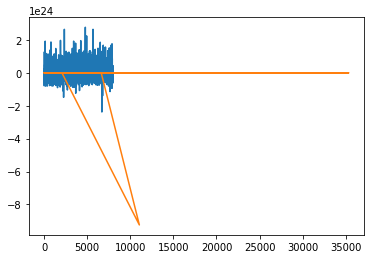

In [ ]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Realizacja regresji liniowej nr 2.

In [ ]:
# Import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Dividing data into Y and X
# Set Target Variable
Y_col = ['adj_close_date','adj_close_mtd','adj_close_qtd','adj_close_htd','adj_close_ytd']
Others = ['Unnamed: 0','symbol','sector','date']
all_column = series.columns
X_col = numpy.setdiff1d(all_column, Y_col)
X_col = numpy.setdiff1d(X_col, Others)

data = df
# Consider features we want to work on:
X = data[X_col]
Y = data['adj_close_date']
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]
#Modeling:
#Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[X_col])
train_y = np.array(train[Y_col])


regr.fit(train_x,train_y)
test_x = np.array(test[X_col])
test_y = np.array(test[Y_col])
# print the coefficient values:
#coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=['Coefficients'])
#coeff_data
#Now let’s do prediction of data:
Y_pred = regr.predict(test_x)
# Check accuracy:
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)
print ('R²:',R)


R²: -1.831762022218026e+43


Realizacja regresji liniowej nr 3.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

model.fit(X_train, y_train)

Y_pred_train = model.predict(X_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, Y_pred_train))

X_test = pd.DataFrame(X_test)
Y_pred_test = model.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, Y_pred_test))

Coefficients: [[-2.33412658e+20  4.69463587e+20  8.00271653e+19 -2.86242187e+23
   1.89697867e+18 -2.14520303e+21  1.87324963e+20 -1.32807751e+22
   1.73063937e+20 -2.92980351e+20 -1.50646915e+19  1.48734425e+19
   9.26826702e+21  8.83565057e+19 -1.47322968e+23  1.94458002e+22
   1.21189611e+22 -3.68342768e+14  0.00000000e+00 -6.15174615e+21]]
Intercept: [3.41705256e+23]
Mean squared error (MSE): 131181326637659779318769931675649179699317342994432.00
Coefficient of determination (R^2): 0.00
Coefficients: [[-2.33412658e+20  4.69463587e+20  8.00271653e+19 -2.86242187e+23
   1.89697867e+18 -2.14520303e+21  1.87324963e+20 -1.32807751e+22
   1.73063937e+20 -2.92980351e+20 -1.50646915e+19  1.48734425e+19
   9.26826702e+21  8.83565057e+19 -1.47322968e+23  1.94458002e+22
   1.21189611e+22 -3.68342768e+14  0.00000000e+00 -6.15174615e+21]]
Intercept: [3.41705256e+23]
Mean squared error (MSE): 117077212287958047483245705424865746479745073152.00
Coefficient of determination (R^2): -9.94


Realizacja XGBoosting.

In [ ]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
  
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
  
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, pred))

[18:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.002438
Coefficient of determination (R^2): -53426760.21


Realizacja LSTM.

In [ ]:
#@title
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
582/582 [==============================] - 34s 45ms/step - loss: nan
Epoch 2/100
582/582 [==============================] - 26s 45ms/step - loss: nan
Epoch 3/100
582/582 [==============================] - 26s 45ms/step - loss: nan
Epoch 4/100
582/582 [==============================] - 27s 47ms/step - loss: nan
Epoch 5/100
582/582 [==============================] - 26s 45ms/step - loss: nan
Epoch 6/100
582/582 [==============================] - 26s 45ms/step - loss: nan
Epoch 7/100
582/582 [==============================] - 27s 46ms/step - loss: nan
Epoch 8/100
582/582 [==============================] - 28s 48ms/step - loss: nan
Epoch 9/100
582/582 [==============================] - 27s 46ms/step - loss: nan
Epoch 10/100
582/582 [==============================] - 27s 46ms/step - loss: nan
Epoch 11/100
582/582 [==============================] - 28s 47ms/step - loss: nan
Epoch 12/100
582/582 [==============================] - 28s 47ms/step - loss: nan
Epoch 13/100
582/582 [===

In [ ]:
# Building the model
model = Sequential()
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64,return_sequences=True, dropout=0.5, input_shape=(X_train.shape[1], X_train.shape[-1]))))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

NameError: ignored

Realizacja szeregu modeli

In [ ]:
#@title
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))